In [25]:
import pandas as pd
import numpy as np
import sqlite3
from pprint import pprint
import seaborn as sb
import altair as alt
from multiprocessing import Pool
alt.renderers.enable('notebook')
import folium
from folium import plugins
from folium.plugins import HeatMap
%matplotlib inline
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pygeohash as pgh
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plot_options = dict(figsize=(12,6))

ValueError: 
To use the 'notebook' renderer, you must install the vega package
and the associated Jupyter extension.
See https://altair-viz.github.io/getting_started/installation.html
for more information.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression

In [30]:
df = pd.read_csv("Fires.csv")
df.head()


/var/folders/wc/vrt3f8rj2y7gg4f0v_6jvnhh0000gn/T/ipykernel_31915/3385490555.py:1: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Fires.csv")


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63.0,63.0,Plumas,NaN
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61.0,61.0,Placer,NaN
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17.0,17.0,El Dorado,NaN
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3.0,3.0,Alpine,NaN
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3.0,3.0,Alpine,NaN


In [ ]:
len(df.columns)

39

In [ ]:
#dropping columns that will have little to no effect on model performance or contain NaN values
drop_cols = ['OBJECTID', 'FOD_ID', 'FPA_ID','NWCG_REPORTING_UNIT_ID','NWCG_REPORTING_UNIT_NAME','SOURCE_REPORTING_UNIT','SOURCE_REPORTING_UNIT_NAME','LOCAL_FIRE_REPORT_ID','LOCAL_INCIDENT_ID','FIRE_CODE','FIRE_NAME','ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME','COMPLEX_NAME','DISCOVERY_DATE','STAT_CAUSE_CODE','FIPS_CODE', 'FIPS_NAME', 'Shape','OWNER_CODE','DISCOVERY_TIME','COUNTY','CONT_DATE','CONT_DOY','CONT_TIME','SOURCE_SYSTEM','SOURCE_SYSTEM_TYPE']
df = df.drop(columns=drop_cols)

In [31]:
# separation of training and testing data 
label_names = sorted(df['STAT_CAUSE_DESCR'].unique())
df_dummies_X = df.drop(columns=['STAT_CAUSE_DESCR'])
df_dummies_X = pd.get_dummies(df_dummies_X)
X = df_dummies_X
Y = df['STAT_CAUSE_DESCR']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=1, stratify=Y)

: 

: 

In [28]:
df_dummies_X = df.drop(columns=['STAT_CAUSE_DESCR'])
df_dummies_X = pd.get_dummies(df_dummies_X)
X = df_dummies_X
Y = df['STAT_CAUSE_DESCR']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=1, stratify=Y)


classifier = RandomForestClassifier(n_estimators=500, max_depth=50, min_samples_leaf=50, random_state=123)

classifier.fit(X_train, Y_train)
training_accuracy = accuracy_score(Y_train, classifier.predict(X_train))
pred = classifier.predict(X_test)
test_accuracy = accuracy_score(Y_test, pred)

print(test_accuracy)

0.5407412528284228


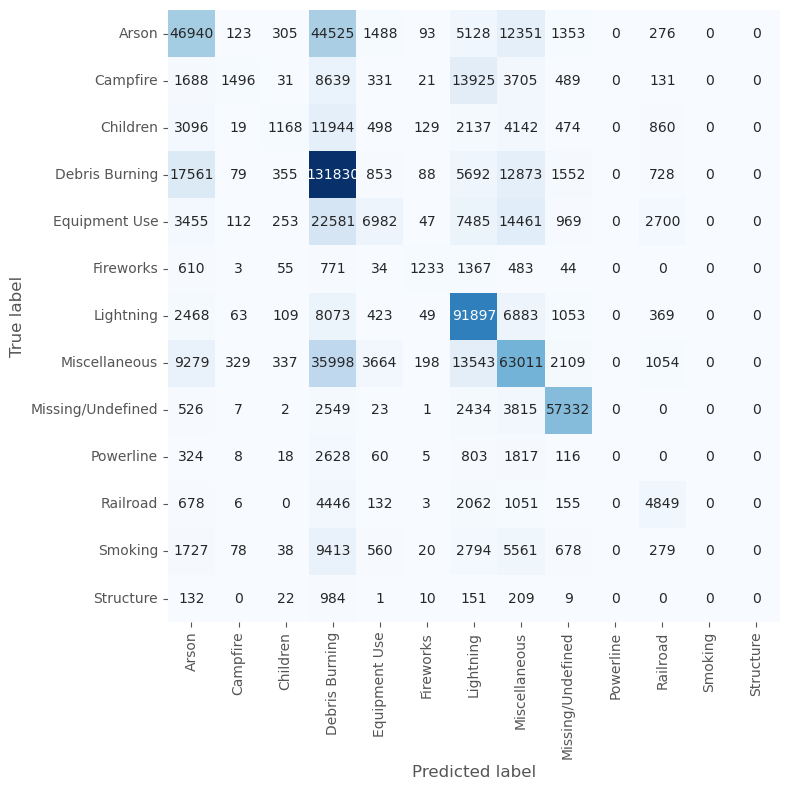

In [29]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
import altair as alt
label_names = sorted(df['STAT_CAUSE_DESCR'].unique())

matrix = confusion_matrix(Y_test, pred)
plt.figure(figsize=(8,8))
sb.heatmap(matrix,square=True,annot=True, fmt='d', cbar=False, cmap='Blues',
          xticklabels=label_names,yticklabels=label_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig("randomforestconfusionmatrix.png", dpi=170)